<a href="https://colab.research.google.com/github/bonitr02/datasci_5_statistics/blob/main/hha507_wk5_assgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5

## Import packages

In [45]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import scipy.stats as stats

## Load Dataset

Information on prevalence, use and spending by count of select chronic conditions among Original Medicare (or fee-for-service) beneficiaries.

In [31]:
df = pd.read_csv('/content/mcc2018.csv')
len(df)
#44976 initial values

44976

### Look for missingness

In [32]:
# Handling whitespace as missing data
df.replace(" ", pd.NA, inplace=True)

In [33]:
## keep only complete rows
df = df.dropna()
len(df)
#23899 remaining values

23899

In [34]:
df.columns

Index(['Bene_Geo_Lvl', 'Bene_Geo_Desc', 'Bene_Geo_Cd', 'Bene_Age_Lvl',
       'Bene_Demo_Lvl', 'Bene_Demo_Desc', 'Bene_MCC', 'Prvlnc',
       'Tot_Mdcr_Stdzd_Pymt_PC', 'Tot_Mdcr_Pymt_PC', 'Hosp_Readmsn_Rate',
       'ER_Visits_Per_1000_Benes'],
      dtype='object')

In [36]:
df.dtypes
#

Bene_Geo_Lvl                 object
Bene_Geo_Desc                object
Bene_Geo_Cd                 float64
Bene_Age_Lvl                 object
Bene_Demo_Lvl                object
Bene_Demo_Desc               object
Bene_MCC                     object
Prvlnc                      float64
Tot_Mdcr_Stdzd_Pymt_PC      float64
Tot_Mdcr_Pymt_PC            float64
Hosp_Readmsn_Rate           float64
ER_Visits_Per_1000_Benes    float64
dtype: object

### Modify column types and remove special characters

In [37]:
df['Bene_Geo_Cd'] = df['Bene_Geo_Cd'].apply(str)
df = df.replace(',', '', regex=True)

## Chi-Square Test

Alternative Hypothesis: There is an association between the geographic location of a Medicare beneficiary and the number of chronic conditions they have.

Null Hypothesis: There is no association between the geographic location of a Medicare beneficiary and the number of chronic conditions they have.

In [35]:
contingency_table = pd.crosstab(df['Bene_Geo_Desc'], df['Bene_MCC'])
print(contingency_table)
# cross table

Bene_MCC              0 to 1  2 to 3  4 to 5  6+
Bene_Geo_Desc                                   
Alabama                   24      21      22  27
Alabama : Autauga          0       1       2   3
Alabama : Baldwin          0       3       3   3
Alabama : Barbour          3       0       1   3
Alabama : Bibb             3       1       0   3
...                      ...     ...     ...  ..
Wyoming : Sweetwater       3       1       2   3
Wyoming : Teton            0       0       1   1
Wyoming : Uinta            3       1       0   2
Wyoming : Washakie         1       1       0   2
Wyoming : Weston           0       0       0   1

[3101 rows x 4 columns]


In [36]:
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 7078.3446790780745
P-value: 1.0


Chi-squared results:
Chi2 value is 7078, indicating that there is a  positive relationship
P value is 1.0, which indicates that the chi2 value is not statistically significant

Summary: Do not reject the null hypothesis

## T-Test
Alternative hypothesis: Hospital Readmission rate is different between beneficiaries under 65 and over 65 years old

Null hypothesis: Hospital Readmission rate is not different between beneficiaries under 65 and over 65 years old

In [56]:
df.drop(df[df['Bene_Age_Lvl'] == 'All'].index, inplace = True)

In [57]:
df.to_csv('/content/mcc2018_geo.csv', index=False)

In [58]:
df2 = pd.read_csv('/content/mcc2018_geo.csv')

In [60]:
df2['Bene_Age_Lvl']

0        65+
1        65+
2        65+
3        65+
4        65+
        ... 
14615    65+
14616    65+
14617    65+
14618    65+
14619    65+
Name: Bene_Age_Lvl, Length: 14620, dtype: object

In [64]:
# Split the data into two groups: under65 and 65andover
under65 = df2[df2['Bene_Age_Lvl'] == '<65']['Hosp_Readmsn_Rate']
under65_mean = under65.mean()
under65_mean

0.1502020979020979

In [63]:
# Split the data into two groups: under65 and over65
over65 = df2[df2['Bene_Age_Lvl'] == '65+']['Hosp_Readmsn_Rate']
over65_mean = over65.mean()
over65_mean

0.11634035430665852

In [65]:
t_stat, p_val = ttest_ind(under65, over65, equal_var=False)

In [66]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 19.545598814363498
P-value: 1.2919795803333869e-83


T-test result is 19.55 indicating a substantial difference between the groups
P-value result is 1.29, indicating a statistially non-significant difference

Summary: Do not reject null hypothesis

## ANOVA
Alternative Hypothesis: Total Medicare Standardized Per Capita Spending will differ across Demographic groups (Race, Sex, Dual Medicare, All groups).

Null Hypothesis: Total Medicare Standardized Per Capita Spending will not differ across Demographic groups (Race, Sex, Dual Medicare, All groups).

In [39]:
groups = df.groupby('Bene_Demo_Lvl')['Tot_Mdcr_Stdzd_Pymt_PC'].mean()
groups

Bene_Demo_Lvl
All            16212.549501
Dual Status    14047.744118
Race           15663.576301
Sex            13527.843263
Name: Tot_Mdcr_Stdzd_Pymt_PC, dtype: float64

In [61]:
# this is our objective test for distribution
stats.shapiro(df['Tot_Mdcr_Stdzd_Pymt_PC'])
#p value is 0, stat is 0.889

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.8891008496284485, pvalue=0.0)

In [10]:
spending = ols('Tot_Mdcr_Stdzd_Pymt_PC ~ C(Bene_Demo_Lvl) ', data=df).fit()

In [14]:
# Performing the one-way ANOVA
anova_table = sm.stats.anova_lm(spending, typ=2)
print(anova_table)

                        sum_sq       df          F        PR(>F)
C(Bene_Demo_Lvl)  1.269621e+10      3.0  27.184791  1.524099e-17
Residual          3.719923e+12  23895.0        NaN           NaN


P-value is 1.52e-17, indicating statistical significance.

Summary: Accept the alternative hypothesis and reject the null hypothesis

## Regression Analysis

Alternative Hypothesis: The amount of stress predicts a patient's quality of sleep

Null Hypothesis: The amount of stress does not predict a patient's quality of sleep

In [18]:
sleep = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [20]:
sleep.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [21]:
sleep.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [53]:
# Perform regression
slope, intercept, r_value, p_value, std_err = stats.linregress(sleep['Stress Level'], sleep['Quality of Sleep'])

In [54]:
# Display results
print(f"Slope (Coefficient for BMI): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")
print(f"P-value: {p_value:.5f}")
print(f"Standard Error: {std_err:.5f}")

Slope (Coefficient for BMI): -0.61
Intercept: 10.58
R-squared value: 0.81
P-value: 0.00000
Standard Error: 0.01533


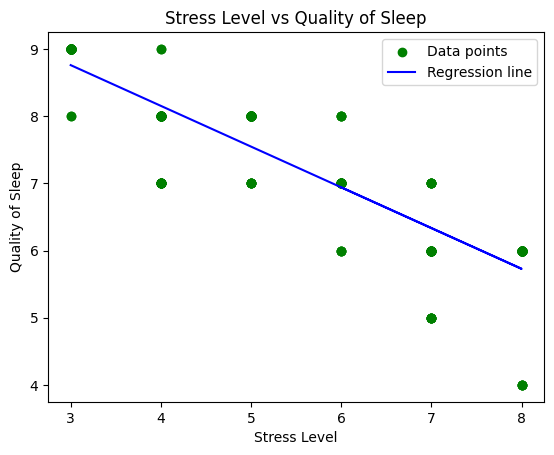

In [58]:
plt.scatter(sleep['Stress Level'], sleep['Quality of Sleep'], color='green', label='Data points')
plt.plot(sleep['Stress Level'], intercept + slope * sleep['Stress Level'], color='blue', label='Regression line')
plt.title('Stress Level vs Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.legend()
plt.show()

# line slopes downward from left to right, indicating that as stress level increases, quality of sleep decreases


In [29]:
# Another regression model
fig = px.scatter(
    sleep, x='Stress Level', y='Quality of Sleep', opacity=0.65,
    trendline='ols', trendline_color_override='magenta'
)
fig.show()